Fuente de los datos: https://www.quandl.com/

FEDERAL RESERVE ECONOMIC DATA (FRED) USA

In [ ]:
!pip install quandl

In [2]:
import quandl

In [12]:
# QUANDL_API_KEY = "4sLKuvo8LszEsAF1Kggr"
# quandl.ApiConfig.api_key = QUANDL_API_KEY

In [3]:
# traer datos sobre el tiempo del GDP
df_gdp = quandl.get("FRED/GDP")
df_gdp

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


### Analizar datos de bienes raíces

In [7]:
real_df = quandl.get("CHRIS/CME_GC1", column_index=6, collapse="weekly", start_date="2010-01-01")
real_df

,Settle
Date,
2010-01-10,1138.9
2010-01-17,1130.5
2010-01-24,1089.7
2010-01-31,1083.0
2010-02-07,1052.2
...,...
2021-06-06,1889.8
2021-06-13,1877.4
2021-06-20,1767.9


In [8]:
# reagruparlo por mes
rs_month = real_df.resample("MS").ffill().dropna()
rs_month

,Settle
Date,
2010-02-01,1083.0
2010-03-01,1118.9
2010-04-01,1104.3
2010-05-01,1153.1
2010-06-01,1212.2
...,...
2021-03-01,1731.6
2021-04-01,1734.7
2021-05-01,1777.8


## Ventana dinámica, agrupar por periodo de tiempo y hacer una operación

In [9]:
# tomar cada 3 semanas
window_t = real_df.rolling(3)
media_real_df = window_t.mean()
media_real_df

,Settle
Date,
2010-01-10,NaN
2010-01-17,NaN
2010-01-24,1119.700000
2010-01-31,1101.066667
2010-02-07,1074.966667
...,...
2021-06-06,1889.666667
2021-06-13,1889.900000
2021-06-20,1845.033333


Visualización

In [10]:
import matplotlib.pyplot as plt

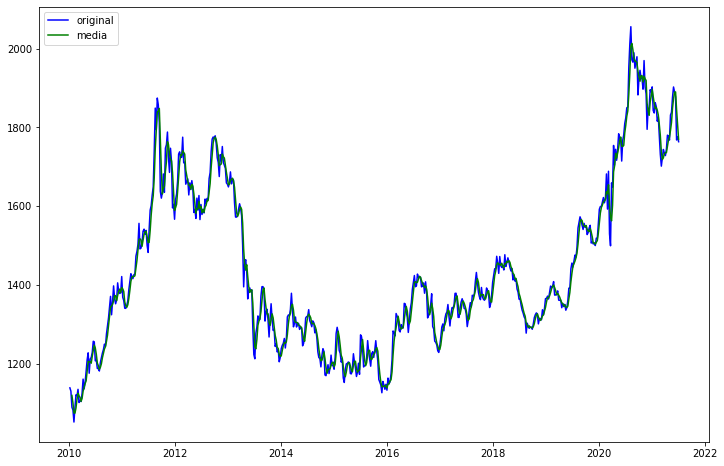

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(real_df, label="original", color="blue")
plt.plot(media_real_df, label="media", color="green")
plt.legend()

### Descomponer una serie para ver las propiedades de la misma

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
season = seasonal_decompose(real_df, freq=12)

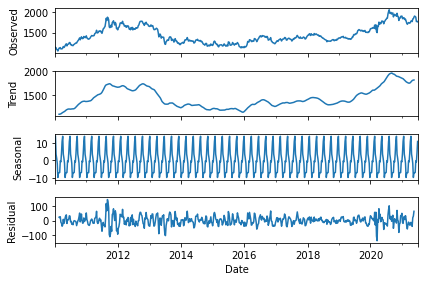

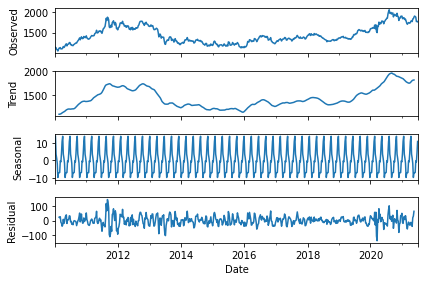

In [18]:
season.plot()